# Lab Sheet 3 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/Lab-Sheet-3.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [1]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling (uncomment if you want)
import numpy as np               # math

As done in previous lab sheets, we first download a wave file $s[k]$ from the internet address `https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/speech_8kHz_murder.wav` using the `curl` command and load it to a variable `s`. You will also need the sampling frequency of the file later, so store this in a variable `fs`. 

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 1:**
    
Load the wave file above and display the signal in the time domain. 
</div>

[-0.00140381 -0.00265503 -0.00183105 ...  0.00912476  0.0085144
  0.00946045]
8000
168360


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  328k  100  328k    0     0  2383k      0 --:--:-- --:--:-- --:--:-- 2400k


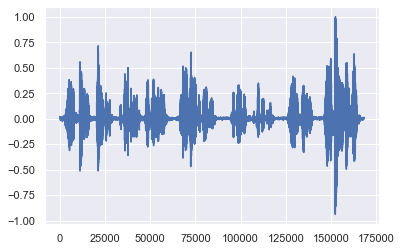

In [6]:
# download 
# your code here ...
import soundfile as sf
s_file_name = 'speech_8kHz_murder.wav'
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/{s_file_name} -o {s_file_name} 
s, fs = sf.read(s_file_name)

print(s)
plt.plot(s)


# load 
# s,fs = ... # complete code here ...
print(fs)
print(len(s))

In [3]:
# listen to the sound file (if you want)
from IPython import display as ipd
print('File "' + s_file_name + '" loaded. Its sampling rate is ' + str(fs) + ' Hz.')
ipd.Audio(s, rate=fs)

File "speech_8kHz_murder.wav" loaded. Its sampling rate is 8000 Hz.


## Block Processing

To illustrate block processing we first cut a piece of $4096$ samples, starting after $10$ seconds of audio , i.e. starting at sample no. 80,000 for a sampling rate of $f_s = 8000$ Hz.

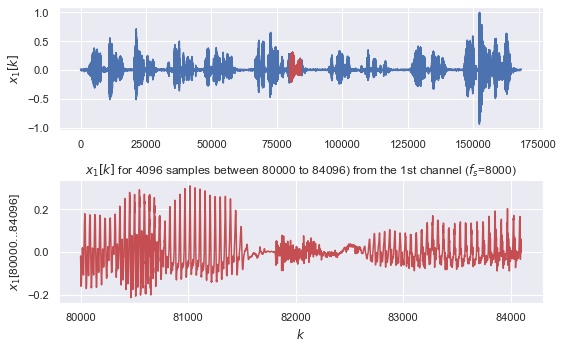

In [4]:
# lets cut out a piece of the data
start_sample  = int(10*fs);                   # start at 10 sec
no_of_samples = 4096;                         # no of samples we want to cut out    
end_sample    = start_sample + no_of_samples; # last sample to be cut out
#切割从start_sample开始到end_sample，间距为no_of_samples）
sample_vec    = np.linspace(start_sample, end_sample, no_of_samples)  

x1=s[start_sample:end_sample];

plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.plot(np.arange(0,len(s)),s) # plot 整个音频
plt.ylabel('$x_1[k]$')
plt.plot(sample_vec,x1,'r')  # 在整个音频中标出sample_vec
plt.subplot(2,1,2)
plt.plot(sample_vec,x1,'r')
plt.xlabel('$k$')
plt.ylabel('$x_1$[' + str(start_sample) + '...' + str(end_sample) + ']')
plt.title('$x_1[k]$ for ' + str(len(x1)) + ' samples between ' 
          + str(start_sample) + ' to ' + str(end_sample) + 
          ') from the 1st channel ($f_s$=' + str(fs) +')')
plt.tight_layout() # this allowes for some space for the title text.

In [6]:
# listen to the short cut-out
ipd.Audio(x1, rate=fs)

The signal $x_1[k]$, i.e. the part from the figure above, will now be further analysed on block or frame basis.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 2:**
    
Split the signal vector in variable `x1` into smaller non-overlapping blocks of length $L_{\mathrm{Bl}}=512$ and viasualise them, similarly as in the figure below.

The python commands `range` and `enumerate` might be helpful for this.

It is not expected that you do all the annotation or colours like in the figure below. The intended learning outcome is that you are able to split a (speech) vector into smaller blocks since this will be needed for the following tasks.
</div>

![Block-Processing-Example](BlockProcessingExample.png)

4096
8


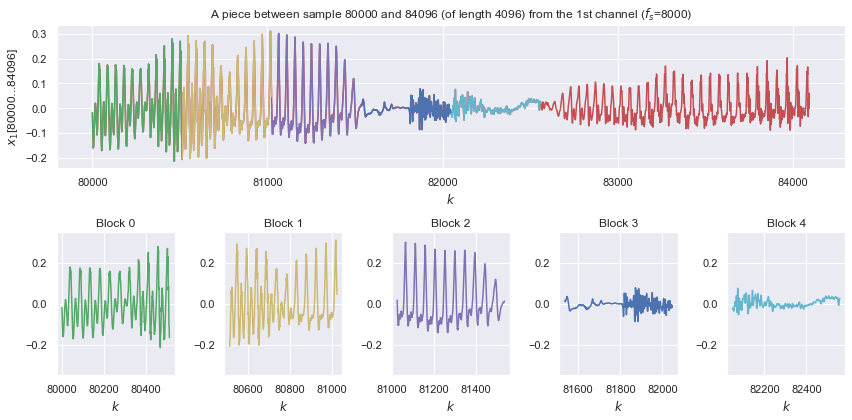

In [9]:
LBl   = 512                    # frame length (a.k.a. block length)
Lov  = 1                       # frame overlap factor (e.g. 1 for no overlap, 2 for 50% overlap)
Lhop = int(np.round(LBl/Lov)); # frame hop size

plt.figure(figsize=(12,6))
# Create a subplot at a specific location inside a regular grid。
# 在特定位置创建子块
# shape: rows, colums
# loc: row number and column number of the axis location within the grid
# 网格内轴的位置坐标
# rowspan,colspan ：行宽(从轴向右）和列宽（从轴向下）
ax1 = plt.subplot2grid(shape=(2, 5), loc=(0, 0), colspan=5)
ax2 = plt.subplot2grid(shape=(2, 5), loc=(1, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(2, 5), loc=(1, 1), colspan=1)
ax4 = plt.subplot2grid(shape=(2, 5), loc=(1, 2), colspan=1)
ax5 = plt.subplot2grid(shape=(2, 5), loc=(1, 3), colspan=1)
ax6 = plt.subplot2grid(shape=(2, 5), loc=(1, 4), colspan=1)
# 把图划进创建好的子块中
ax_blocks = [ax2, ax3, ax4, ax5, ax6]


ax1.plot(sample_vec,x1,'r')
ax1.set_xlabel('$k$')
ax1.set_ylabel('$x_1$[' + str(start_sample) + '...' + str(end_sample) + ']');
ax1.set_title('A piece between sample ' + str(start_sample) + 
          ' and ' + str(end_sample) + ' (of length ' + str(len(x1)) + 
          ') from the 1st channel ($f_s$=' + str(fs) +')')


# complete the code to create smaller blocks of data.
num_block = int(len(x1)/LBl) 
print(len(x1))
# plt.plot(np.arange(start_sample,len(x1),x1)
print(num_block)
for ii,k in enumerate(range(start_sample,start_sample+5*Lhop,Lhop)):
    # range(start, stop, step)
    # ii 在enumerate中遍历0,1,2,3,4
    # k 在range中遍历
    block_k_vec = np.arange(k,k+LBl)
    block_sig_vec = x1[ii*Lhop:ii*Lhop+LBl]
    clrs = ['g','y','m','b','c','k'] #设定每一块的颜色
    ax1.plot(block_k_vec,block_sig_vec,clrs[ii])
    
    ax_blocks[ii].plot(block_k_vec,block_sig_vec,clrs[ii])
    ax_blocks[ii].set_xlabel('$k$')
    ax_blocks[ii].set_ylim(-0.35, 0.35)
    ax_blocks[ii].set_title('Block ' + str(ii))
    
    # 调整子图之间和周围填充
    plt.tight_layout()
    
    
# for i in range(num_block):
         
#          start_blocki = start_sample + i * LBl                  
#          no_of_samples = LBl                        
#          end_blocki = start_blocki + no_of_samples; 
#          sample_b = np.linspace(start_blocki, end_blocki, no_of_samples)  
#          blocki=s[start_blocki:end_blocki]
#          plt.figure(figsize=(8,5))
         
#          plt.plot(range(start_blocki,end_blocki),blocki,'r')  



<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 2 b:**
    
Is the given block length $L_{\mathrm{Bl}}=512$ an appropriate choice for this speech signal? Please justify why or why not. (This obviously is not a programming task.)
    
</div>

## Voiced / Unvoiced Detection

Download two wave files `https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/voiced_unvoiced_e.wav` and `https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/voiced_unvoiced_z.wav` and store them in variables `e` and `z`. 

Please note: Since the signals you downloaded might have different sampling frequencies $f_s$, you might want to store these in different variable, like e.g. `fs_z` and `fs_e`.

In the following we will calculate 

* block-based short-term energy and
* zero-Crossing rate

which you can apply to all three availale signals now (`e`, `z` and `s`).

### Short-term energy

The short-term energy for each frame can be calculated by

\begin{equation}
E=\sum_{k=0}^{L_{\mathrm{Bl}}-1}s^2[k].
\end{equation}

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 3:**
    
Calculate the short term energy for each block in the signal(s) and visualise them together with the signal.
</div>


In [23]:
# your code here ()
e, fs_e = sf.read('C:\\Users\\test_account\\Downloads\\voiced_unvoiced_e.wav')
z, fs_z = sf.read('C:\\Users\\test_account\\Downloads\\voiced_unvoiced_z.wav')
E=np.sum(s[0:LBl-1]**2)
# ...
def cala_STE(signal, sampsPerFrame):
    nFrames       = int(len(signal) / sampsPerFrame)  # number of non-overlapping blocks
    print(nFrames)
    E = np.zeros(nFrames)
    print(E)
    for frame in range(nFrames):
#         print(frame)
    
        E[frame] = np.sum(signal[frame * sampsPerFrame:frame * sampsPerFrame + sampsPerFrame]**2)
    return E
    print(frame)
    
cala_STE(z, LBl)
cala_STE(e, LBl)
cala_STE(s, LBl)

63
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([1.66986138e-06, 1.08033419e-05, 3.05593014e-04, 5.08702639e-03,
       1.86534878e-02, 5.62952263e-02, 8.47872412e-02, 2.10927652e-01,
       2.97910175e-01, 5.44461109e-01, 7.42429690e-01, 9.04917790e-01,
       1.20982829e+00, 1.56701744e+00, 1.67888904e+00, 2.06475118e+00,
       3.55120382e+00, 3.06759790e+00, 3.75465489e+00, 3.77714390e+00,
       3.11497458e+00, 3.43617434e+00, 3.06899977e+00, 2.88284731e+00,
       3.44930236e+00, 4.15523137e+00, 4.11188505e+00, 4.11319450e+00,
       3.86996546e+00, 4.55967705e+00, 3.54731652e+00, 4.40029928e+00,
       4.32184267e+00, 3.72677120e+00, 3.65667223e+00, 4.13065430e+00,
       3.23018289e+00, 3.68081131e+00, 3.75978528e+00, 3.41334442e+00,
       2.67728632e+00, 2.90128102e+00, 2.81697598e+00, 3.01955742e+00,
       3.51432859e+00, 2.63376675e+00, 2.61769118e+00, 3.67056309e+00,
       3.19309778e+00, 3.10223158e+00, 3.50245209e+00, 3.54489841e+00,
       3.20391328e+00, 3.49184169e+00, 2.75461212e+00, 3.85386673e+00,
      

In [24]:
ipd.Audio(e, rate=fs_e)

In [25]:
ipd.Audio(z, rate=fs_z)

### Zero-Crossing Rate

The zero crossing rate for a frame can be calculated by

\begin{equation}
\mathrm{ZCR}=\sum_{k=1}^{L_{\mathrm{BL}}−1} 0.5 |\mathrm{sign}(s[k])−\mathrm{sign}(s[k−1])|
\end{equation}

Hint: The function `np.sign()` will help to implement the equation above.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 4:**
    
Calculate the zero-crossing rate for each block in the signal(s) and vsualise them together with the signal.
</div>

In [ ]:
# your code here
def calc_ZCR(signal, sampsPerFrame):
    nFrames = int(len(signal)/sampsPerFrame)
    ZCR = np.zeros(nFrames) # 返回一个用0填充的矩阵（数组）
    for frame in range(nFrames):
        signalframe = signal[frame * sampsPerFrame:frame * sampsPerFrame + sampsPerFrame]
        
        for k in range(1, len(signalframe)):
            ZCR = np.sum(0.5 * abs(np.sign(signalframe[k]) - np.sign(signalframe[k - 1])))
    
    return ZCR

### Correlation of two sequences

Correlation describes a statistical relationship between data, in our case between speech signals which are viewed as (realisations of) processes. This means that correlation is a measurement of similarity:
Two signals which are highly correlated (i.e., which have a strong statistical relationship) are similar to each other.

The correlation between two signals $x[k]$ and $y[k]$ is defined as <sup>[[MW1]](https://mathworld.wolfram.com/StatisticalCorrelation.html)</sup>

\begin{equation}
r_{xy} = \frac{c_{xy}}{\sigma_x \sigma_y}
\end{equation}

where $\sigma_x$ and $\sigma_y$ are the [standard deviations](https://en.wikipedia.org/wiki/Standard_deviation "Definition of standard deviation on Wikipedia") of the signals and $c_{xy}$ is the [covariance]协方差(https://en.wikipedia.org/wiki/Covariance "Definition of covariance on Wikipedia") between the two signals which can be estimated from the signals (please note that the hat ($\hat{c}$) indicates that the quantity $c$ is estimated) by <sup>[[MW2]](https://mathworld.wolfram.com/Covariance.html)</sup>

\begin{equation}
\hat{c}_{xy} = \frac{1}{L}\sum_{k=1}^L (x[k]-\bar{y})(y[k]-\bar{y})
\end{equation}

with the respective [(sample) mean](https://en.wikipedia.org/wiki/Sample_mean_and_covariance) values

$$\bar{x} = \frac{1}{L}\sum_{i=1}^L x[i],$$
$$\bar{y} = \frac{1}{L}\sum_{i=1}^L y[i].$$

With estimates for the variances $\hat{\sigma}^2_x$ and $\hat{\sigma}^2_y$

$$\hat{\sigma}_x^2 = \frac{1}{L}\sum_{i=1}^L (x[i]-\bar{x})$$
$$\hat{\sigma}_y^2 = \frac{1}{L}\sum_{i=1}^L (y[i]-\bar{y})$$

we obtain

\begin{equation}
\hat{r}_{xy} = \frac{\sum_{k=1}^L (x[k]-\bar{x})(y[k]-\bar{y})}{L \cdot \hat{\sigma}_x \hat{\sigma}_y}.
\label{eq:defCorrelationEstWithMeanAndVariance}\tag{1}
\end{equation}

as an estimate of the correlation. If the means and standard deviations of the signals are $\bar{x}=\bar{y}=0$ and $\hat{\sigma}_x=\hat{\sigma}_y=1$, respectively, this simplifies to
\begin{equation}
\hat{r}_{xy} = \frac{1}{L}\sum_{k=1}^{L}x[k]y[k].
\label{eq:defCorrelationEst}\tag{2}
\end{equation}

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 5: (already solved)**
    
Implement a second function `normalize_and_correlate` according to equation \eqref{eq:defCorrelationEstWithMeanAndVariance} which ensures that the signals have mean of $0$ and standard deviation of $1$ by subtracting the former and dividing by the latter. Then the function `correlation` (which you are supposed to write / complete in Task 6) and return its value.
    
In the interest of time for this lab this task is already solved below. It should give us an example how to solve Task 6.
</div>

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 6:**
    
Implement a function `correlation` according to equation \eqref{eq:defCorrelationEst} which takes two signals and should return the correlation value, assuming both signals have mean $0$ and standard deviation $1$.
</div>

In [37]:
def correlation(signal1, signal2):
    """Return the correlation value of two signals which are assumed to be normalized (mean 0, std 1)."""
    L = len(signal1)
    for k in range(1, L):
        rxy_est = (1/L) * np.sum(signal1[k] * signal2[k])   # complete here
    return rxy_est

def normalize_and_correlate(signal1, signal2):
    """Return the correlation value of two signals after normalizing them."""
    return correlation(
        ((signal1 - np.mean(signal1)) / np.std(signal1)),
        ((signal2 - np.mean(signal2)) / np.std(signal2)),
    )

The following function plots two signals, their element-wise multiplication and the resulting correlation value. The code is given as a helping function to understand the correlation. Nothing has to be changed in the code block below.

In [38]:
def plot_correlation(signal1, signal2, title=""):
    # Ensure that both signals have the same number of samples
    assert len(signal1) == len(signal2)
    # assert 声明某个函数是真的
    
    # Ensure that the signals have both mean 0 and standard deviation 1
    signal1 = (signal1 - np.mean(signal1)) / np.std(signal1)
    signal2 = (signal2 - np.mean(signal2)) / np.std(signal2)
    
    multiplied_signals = signal1 * signal2
    correlation_value = correlation(signal1, signal2)

    y_max = max(np.max(np.abs(signal1)), np.max(np.abs(signal2)), np.max(np.abs(multiplied_signals)))
    
    #fig, axs = plt.subplots(3, figsize=(12, 6))
    fig = plt.figure(figsize=(12, 6), constrained_layout=True)
    fig.suptitle(title)

    # Create grid for the different plots
    gs = fig.add_gridspec(3, 10)
    # add_gridspec（nrow,ncol)获取以该图形为父级的GridSpec
    

    axs = [fig.add_subplot(gs[0, :-1]), fig.add_subplot(gs[1, :-1]), 
           fig.add_subplot(gs[2, :-1]), fig.add_subplot(gs[:,-1])]
    
    axs[0].plot(np.arange(len(signal1)), signal1, marker="o", lw=0.1)
    axs[1].plot(np.arange(len(signal2)), signal2, marker="o", lw=0.1)
    axs[2].plot(np.arange(len(multiplied_signals)), multiplied_signals, marker="o", lw=0.1)
    # axhline 绘制平行于x轴的水平参考线
    # lw = linewidth 
    axs[3].axhline(0, color="black", lw=0.5)
    axs[3].axhline(correlation_value, lw=3)

    axs[0].set_ylim(-y_max*1.1, y_max*1.1)
    axs[1].set_ylim(-y_max*1.1, y_max*1.1)
    axs[2].set_ylim(-y_max*1.1, y_max*1.1)
    axs[2].set_ylim(-np.max(np.abs(multiplied_signals)) * 1.1, np.max(np.abs(multiplied_signals)) * 1.1)
    axs[3].set_ylim(-1.01, 1.01)
    #xticks()中有3个参数 xticks(locs, [labels], **kwargs)
    #locs参数是一个数组，用于设置X轴刻度间隔
    #[labels]参数也是一个数组，用于设置每个间隔的显示标签
    #**kwargs可用于设置标签字体倾斜度和颜色等
    axs[3].set_xticks([])
    axs[0].get_xaxis().set_ticks([])
    axs[0].set_ylabel("$x[t]$")
    axs[1].set_ylabel("$y[t]$")
    axs[2].set_ylabel("$x[t]\cdot y[t]$")
    axs[1].get_xaxis().set_ticks([])
    axs[2].set_xlabel("time in samples")
    axs[0].title.set_text("The first signal $x[t]$")
    axs[1].title.set_text("The second signal $y[t]$")
    axs[2].title.set_text("Element-wise multiplication of both signals")
    axs[3].title.set_text("Correlation: {:.2f}".format(correlation_value))

#### Examples - Correlation of two sequences

We can check the correlation of different signals:
1. Correlation of a (sine) signal with itself.
2. Correlation of a sine wave with a sine wave shifted by $\pi$.
3. Correlation of two white noise signals.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 7:**
    
Explote the three correlations for the signals mentioned above.
</div>

##### Correlation of a (sine) signal with itself

E:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


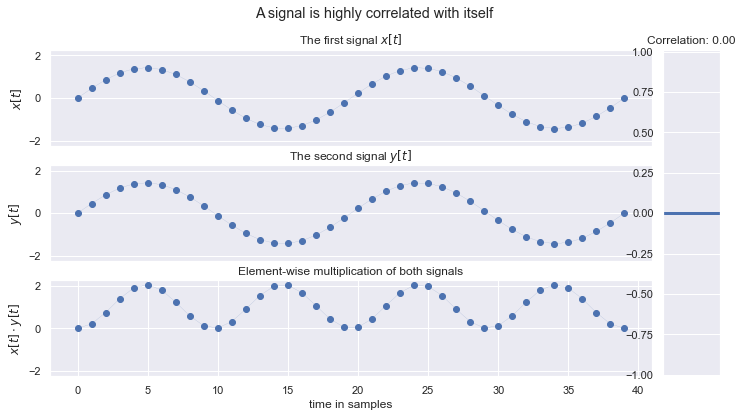

In [39]:
signal1 = np.sin(np.linspace(0, 4*np.pi, 40)) # complete the code
plot_correlation(signal1, signal1,"A signal is highly correlated with itself")

##### Correlation of a sine wave with a sine wave shifted by $\pi$.

E:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


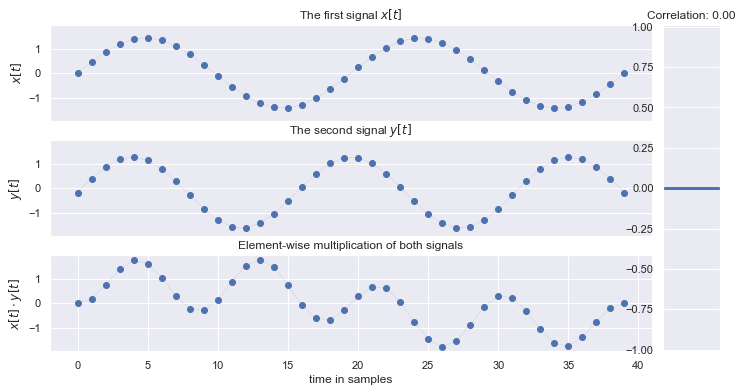

In [45]:
# your code here
signal1 = np.sin(np.linspace(0, 4*np.pi, 40))
signal2 = np.sin(np.linspace(0, 5*np.pi, 40))
plot_correlation(signal1, signal2)

##### Correlation of two (white) noise signals.

The code for generating the first noise signal is alradey provided below. Generate a second noise signal accordingly and explore the correlation.

E:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


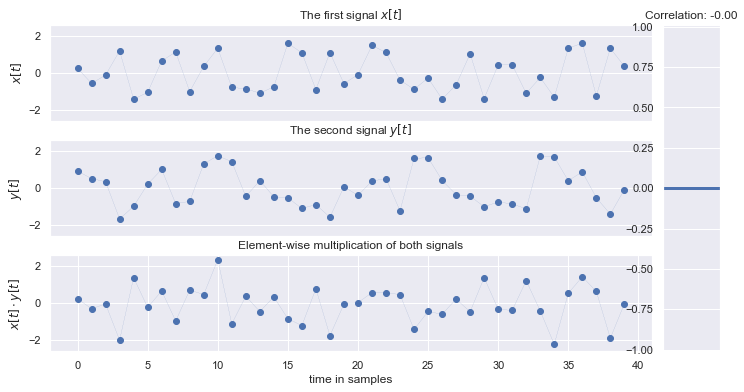

In [46]:
np.random.seed(100)
noise1 = np.random.uniform(-1, 1, size=40)

# your code here
noise2 = np.random.uniform(0, 2, size = 40)
plot_correlation(noise1, noise2)